# Analysis 
Need to answer 1 to 5 here 
1. Are there certain groups that have local access to green space?
2. Are there groups that are lacking access?
3. What there big differences in how far people have to walk to access their green space?
4. Are there any differences between rural and urban areas?
5. How do people in neighbourhoods with good access to green space differ from those who have no good access? Are there differences in how they rate their neighbourhoods? Are there differences in how they rate their communities?
6. Is there any way to predict which households would have higher ratings?

```
About my 'clean data' :
Data has all the useful columns but there are currently in counts 
For analysis I would like to change them to proportions, I will filter out subsets of the data that I am interested in and change them to proportions as I go. 
```

In [2]:
import pandas as pd 
import numpy as np 

In [118]:
green = pd.read_csv('clean_data/green.csv')
green

/var/folders/h4/vy1nwyvd5kz_n6950nl29pj80000gn/T/ipykernel_76917/2395335574.py:1: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  green = pd.read_csv('clean_data/green.csv')


,datecode,value,walking_distance_to_nearest_greenspace,age,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,neighbourhood_rating,community_belonging
0,2015,14.1,Less than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
1,2015,14.4,Less than 10 minutes,All,All,All,All,All,Pensioners,All,NaN,NaN
2,2017,40.1,Less than 10 minutes,65 years and over,All,All,All,All,All,All,NaN,NaN
3,2016,3.1,Less than 10 minutes,All,All,All,All,All,Adults,All,NaN,NaN
4,2015,14.3,Less than 10 minutes,All,All,All,All,Owned Mortgage/Loan,All,All,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112765,2019,3.3,All,NaN,All,All,All,All,Adults,All,NaN,Not very strongly
112766,2014,9.6,All,NaN,All,All,All,All,All,White,NaN,Not very strongly
112767,2017,16.0,All,NaN,All,All,All,All,All,All,NaN,Not very strongly
112768,2018,16.0,All,NaN,Female,All,All,All,All,All,NaN,Not very strongly


## Question 1 and 2 
1. Are there certain groups that have local access to green space?
2. Are there groups that are lacking access?
<br>
I will answer with age, gender, etnicity 

In [122]:
green.rename(columns={'walking_distance_to_nearest_greenspace':'distance'}, inplace = True)
green = green[green.distance.isin(['Less than 10 minutes', 'More than 10 minutes'])].copy()

### Age groups 

In [119]:
# Age 
green[green.age != 'All'].groupby('age').value.agg('mean')


age
16-34 years          32.969521
35-64 years          33.113391
65 years and over    32.635546
Name: value, dtype: float64

In [123]:
age_df =green[green.age != 'All'].copy()
age_df

,datecode,value,distance,age,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,neighbourhood_rating,community_belonging
2,2017,40.1,Less than 10 minutes,65 years and over,All,All,All,All,All,All,NaN,NaN
5,2016,36.8,Less than 10 minutes,35-64 years,All,All,All,All,All,All,NaN,NaN
15,2017,16.6,Less than 10 minutes,16-34 years,All,All,All,All,All,All,NaN,NaN
25,2014,6.0,Less than 10 minutes,35-64 years,All,All,All,All,All,All,NaN,NaN
42,2013,8.0,Less than 10 minutes,65 years and over,All,All,All,All,All,All,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
73285,2016,0.0,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Don't know
73286,2015,45.6,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Very strongly
73287,2017,4.1,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Not at all strongly
73288,2017,27.4,Less than 10 minutes,NaN,All,All,All,All,All,All,NaN,Very strongly


In [129]:
age_grouped = age_df.groupby(['distance','age']).value.agg('mean').reset_index(name = 'mean')


In [130]:
age_grouped

,distance,age,mean
0,Less than 10 minutes,16-34 years,43.703058
1,Less than 10 minutes,35-64 years,43.947114
2,Less than 10 minutes,65 years and over,41.256566
3,More than 10 minutes,16-34 years,11.502446
4,More than 10 minutes,35-64 years,11.351739
5,More than 10 minutes,65 years and over,15.393506


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Proportion')

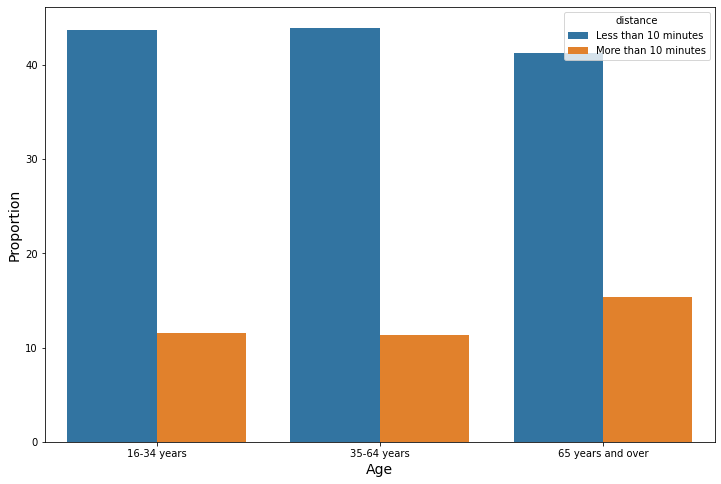

In [131]:
plt.figure(figsize=(12,8)) 
sns.barplot(x='age', y = 'mean', hue = 'distance', data = age_grouped,order = ['16-34 years', '35-64 years', '65 years and over'])
plt.xlabel('Age', fontsize=14)
plt.ylabel('Proportion', fontsize=14)

### Age Conclusion
For different age groups, there's not clear difference. They all have a roughly 2:1 ratio for less than 10mins to more than 10mins 

### Gender 

In [133]:
gender_df =green[green.gender != 'All'].copy()
gender_df

,datecode,value,distance,age,gender,urban_rural_classification,simd_quintiles,type_of_tenure,household_type,ethnicity,neighbourhood_rating,community_belonging
0,2015,14.1,Less than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
18,2015,19.0,Less than 10 minutes,All,Female,All,All,All,All,All,NaN,NaN
28,2015,5.8,Less than 10 minutes,All,Female,All,All,All,All,All,NaN,NaN
29,2015,8.0,Less than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
36,2017,13.0,Less than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
28837,2016,3.0,More than 10 minutes,All,Female,All,All,All,All,All,NaN,NaN
28838,2016,6.7,More than 10 minutes,All,Female,All,All,All,All,All,NaN,NaN
28849,2016,3.0,More than 10 minutes,All,Male,All,All,All,All,All,NaN,NaN
28850,2014,26.0,More than 10 minutes,All,Female,All,All,All,All,All,NaN,NaN


In [134]:
gender_grouped = gender_df.groupby(['distance','gender']).value.agg('mean').reset_index(name = 'mean')
gender_grouped

,distance,gender,mean
0,Less than 10 minutes,Female,43.102670
1,Less than 10 minutes,Male,43.864719
2,More than 10 minutes,Female,12.498413
3,More than 10 minutes,Male,11.125253


Text(0, 0.5, 'Mean')

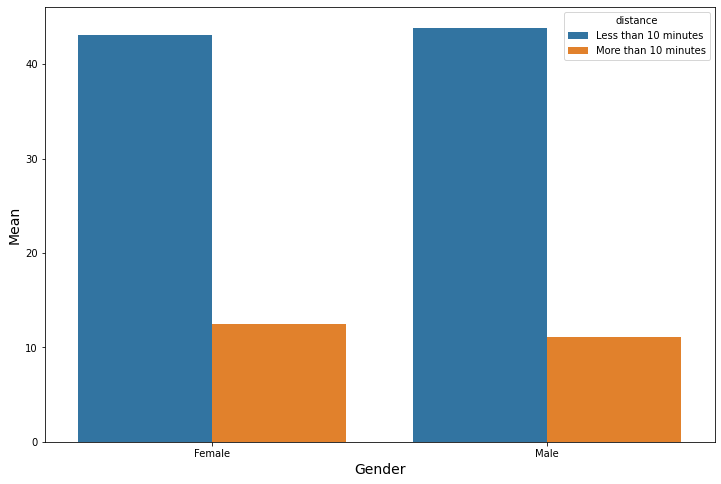

In [135]:
plt.figure(figsize=(12,8)) 
sns.barplot(x='gender', y = 'mean', hue = 'distance', data = gender_grouped)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Mean', fontsize=14)

#### similar

### Ethnicity

In [136]:
ethnicity_df =green[green.ethnicity != 'All'].copy()

In [138]:
ethnicity_grouped = ethnicity_df.groupby(['distance','ethnicity']).value.agg('mean').reset_index(name = 'mean')
ethnicity_grouped

,distance,ethnicity,mean
0,Less than 10 minutes,Other,40.125926
1,Less than 10 minutes,White,43.573521
2,More than 10 minutes,Other,16.922222
3,More than 10 minutes,White,11.675180


Text(0, 0.5, 'Mean')

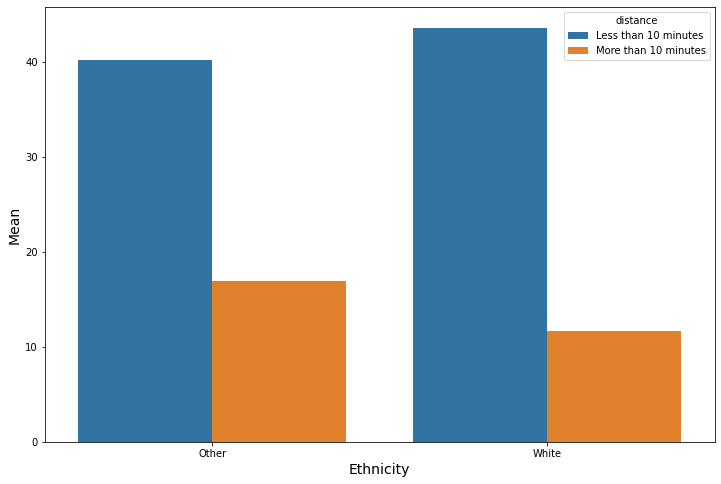

In [139]:
plt.figure(figsize=(12,8)) 
sns.barplot(x='ethnicity', y = 'mean', hue = 'distance', data = ethnicity_grouped)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Mean', fontsize=14)

### Ethnicity ...same 
same same same ....

#### So at this point I failed m plan, I will look into more groups
I will try all the rest of the columns apart from the ones that are mentiosned in other questions 


In [91]:
green.columns

Index(['distance', 'age', 'gender', 'urban_rural_classification',
       'simd_quintiles', 'type_of_tenure', 'household_type', 'ethnicity',
       'neighbourhood_rating', 'community_belonging'],
      dtype='object')

In [89]:
green.simd_quintiles.unique()

array(['All', '80% least deprived', '20% most deprived'], dtype=object)

In [92]:
green.household_type.unique()

array(['All', 'Pensioners', 'Adults', 'With Children'], dtype=object)

In [93]:
green.type_of_tenure.unique()

array(['All', 'Owned Mortgage/Loan', 'Owned Outright', 'Social Rented',
       'Private Rented', 'Other'], dtype=object)

#### SIMD 

In [140]:
simd_df =green[green.simd_quintiles != 'All'].copy()
simd_grouped = simd_df.groupby(['distance','simd_quintiles']).value.agg('mean').reset_index(name = 'mean')
simd_grouped

,distance,simd_quintiles,mean
0,Less than 10 minutes,20% most deprived,41.798732
1,Less than 10 minutes,80% least deprived,43.610317
2,More than 10 minutes,20% most deprived,14.542029
3,More than 10 minutes,80% least deprived,11.612121


Text(0, 0.5, 'Mean')

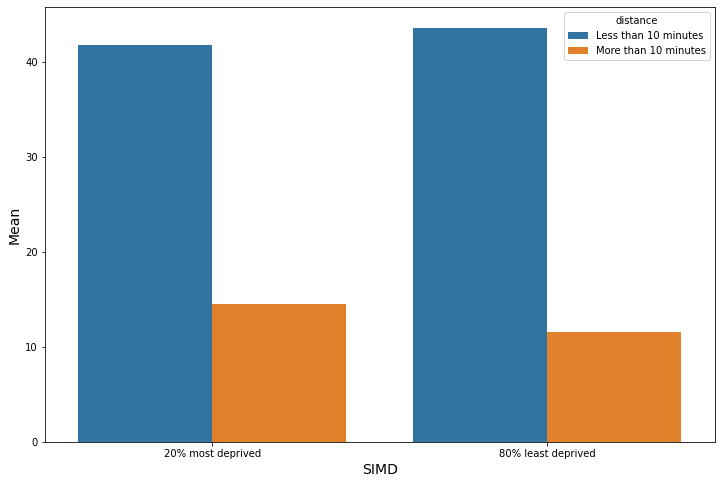

In [141]:
plt.figure(figsize=(12,8)) 
sns.barplot(x='simd_quintiles', y = 'mean', hue = 'distance', data = simd_grouped)
plt.xlabel('SIMD', fontsize=14)
plt.ylabel('Mean', fontsize=14)

#### house type 

In [142]:
house_df =green[green.household_type != 'All'].copy()
house_grouped = house_df.groupby(['distance','household_type']).value.agg('mean').reset_index(name = 'mean')
house_grouped

,distance,household_type,mean
0,Less than 10 minutes,Adults,43.937013
1,Less than 10 minutes,Pensioners,41.460245
2,Less than 10 minutes,With Children,44.320190
3,More than 10 minutes,Adults,10.989710
4,More than 10 minutes,Pensioners,15.099567
5,More than 10 minutes,With Children,11.107364


Text(0, 0.5, 'Mean')

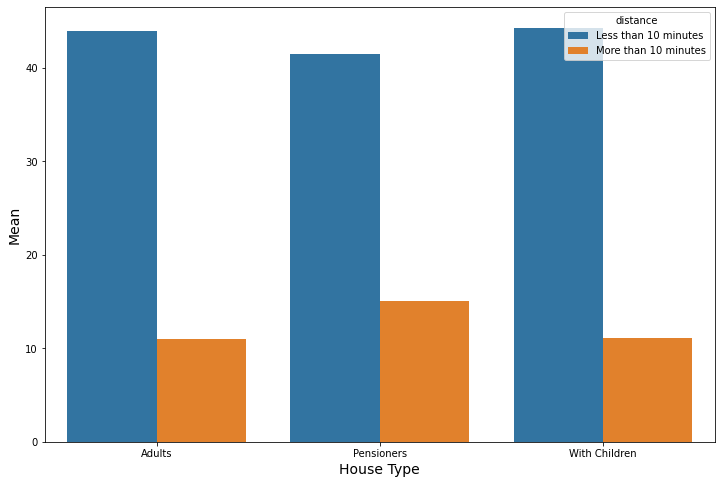

In [143]:
plt.figure(figsize=(12,8)) 
sns.barplot(x='household_type', y = 'mean', hue = 'distance', data = house_grouped)
plt.xlabel('House Type', fontsize=14)
plt.ylabel('Mean', fontsize=14)

#### type_of_tenure

In [144]:
tenure_df =green[green.type_of_tenure != 'All'].copy()
tenure_grouped = tenure_df.groupby(['distance','type_of_tenure']).value.agg('mean').reset_index(name = 'mean')
tenure_grouped

,distance,type_of_tenure,mean
0,Less than 10 minutes,Other,40.354762
1,Less than 10 minutes,Owned Mortgage/Loan,44.506016
2,Less than 10 minutes,Owned Outright,42.888384
3,Less than 10 minutes,Private Rented,42.272523
4,Less than 10 minutes,Social Rented,42.768763
5,More than 10 minutes,Other,16.585714
6,More than 10 minutes,Owned Mortgage/Loan,10.561928
7,More than 10 minutes,Owned Outright,13.182828
8,More than 10 minutes,Private Rented,13.690090
9,More than 10 minutes,Social Rented,12.556751


Text(0, 0.5, 'Mean')

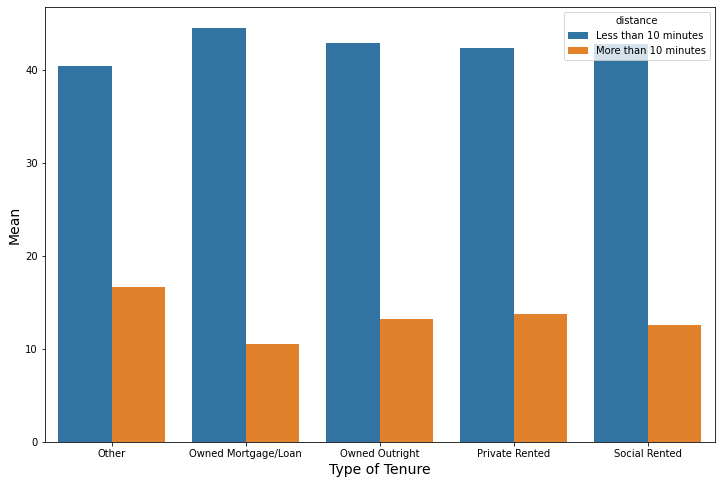

In [145]:
plt.figure(figsize=(12,8)) 
sns.barplot(x='type_of_tenure', y = 'mean', hue = 'distance', data = tenure_grouped)
plt.xlabel('Type of Tenure', fontsize=14)
plt.ylabel('Mean', fontsize=14)

4. Are there any differences between rural and urban areas?
5. How do people in neighbourhoods with good access to green space differ from those who have no good access? Are there differences in how they rate their neighbourhoods? Are there differences in how they rate their communities?

In [147]:
ur_df =green[green.urban_rural_classification != 'All'].copy()
ur_grouped = ur_df.groupby(['distance','urban_rural_classification']).value.agg('mean').reset_index(name = 'mean')
ur_grouped

,distance,urban_rural_classification,mean
0,Less than 10 minutes,Rural,43.965948
1,Less than 10 minutes,Urban,43.744300
2,More than 10 minutes,Rural,11.332749
3,More than 10 minutes,Urban,11.285137


Text(0, 0.5, 'Mean')

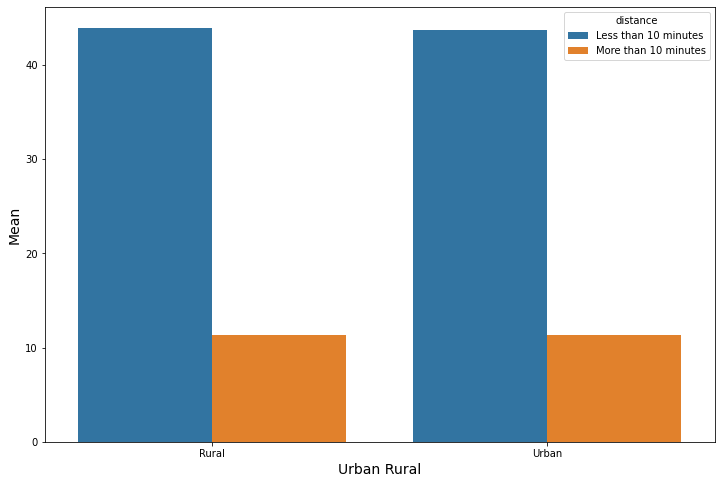

In [148]:
plt.figure(figsize=(12,8)) 
sns.barplot(x='urban_rural_classification', y = 'mean', hue = 'distance', data =ur_grouped)
plt.xlabel('Urban Rural', fontsize=14)
plt.ylabel('Mean', fontsize=14)

In [117]:
ur_g = ur_df.groupby(['distance'])

ur_grouped = ur_g['urban_rural_classification'].value_counts().reset_index(name = 'count')
ur_grouped
#doesn't even make sense 

,distance,urban_rural_classification,count
0,Less than 10 minutes,Urban,1386
1,Less than 10 minutes,Rural,696
2,More than 10 minutes,Urban,693
3,More than 10 minutes,Rural,342
